<a href="https://colab.research.google.com/github/AndresChavez123/SenalesySistemas/blob/main/Transformadadelaplace7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Demuestre si los siguientes sistemas de la forma y = H{x},
son sistemas lineales e invariantes en el tiempo (SLIT) (simule los sistemas en Python):

Sistema 1:

 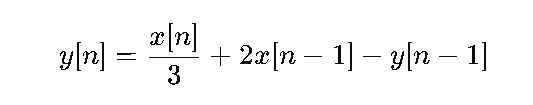

 Linealidad:

Tiene una combinación lineal de entradas
𝑥
[
𝑛
]
,
𝑥
[
𝑛
−
1
], y salidas pasadas
𝑦
[
𝑛
−
1
]


A pesar de depender de la salida pasada, el sistema es lineal porque no hay productos o funciones no lineales aplicadas a
𝑥
 o
𝑦
.
Invarianza en el tiempo:

Para comprobarlo, desplazamos
𝑥
[
𝑛
]
→
𝑥
[
𝑛
−
𝑛
0
]
y verificamos si
𝑦
[
𝑛
]
→
𝑦
[
𝑛
−
𝑛
0
]
.

El sistema sí es invariante en el tiempo.

 Este sistema es SLIT.

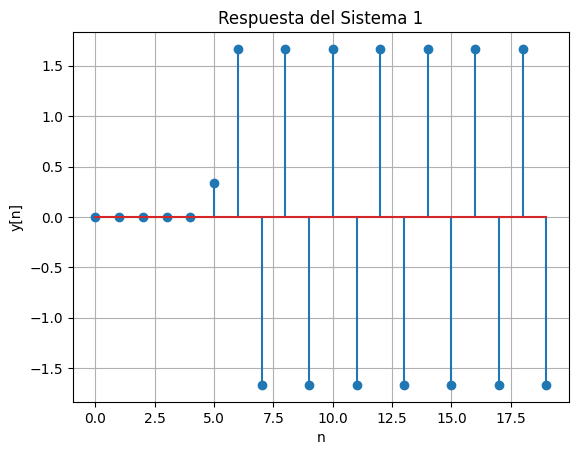

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sistema1(x):
    y = np.zeros_like(x, dtype=float)
    for n in range(1, len(x)):
        y[n] = x[n]/3 + 2*x[n-1] - y[n-1]
    return y

# Señal de entrada
n = np.arange(20)
x = np.zeros_like(n)
x[5] = 1  # impulso

y = sistema1(x)

plt.stem(n, y)
plt.title("Respuesta del Sistema 1")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid()
plt.show()


Sistema 2.

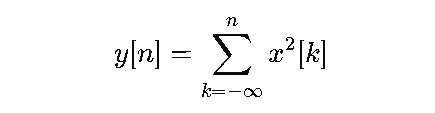



Linealidad:
NO es lineal, ya que involucra
𝑥
[
𝑘
]
2

 . El cuadrado rompe la propiedad de aditividad y homogeneidad.

b. Invarianza en el tiempo:
Si desplazamos la entrada, la salida también se desplaza igual.

 Sí es invariante en el tiempo.

 No es SLIT (solo invariante en el tiempo).

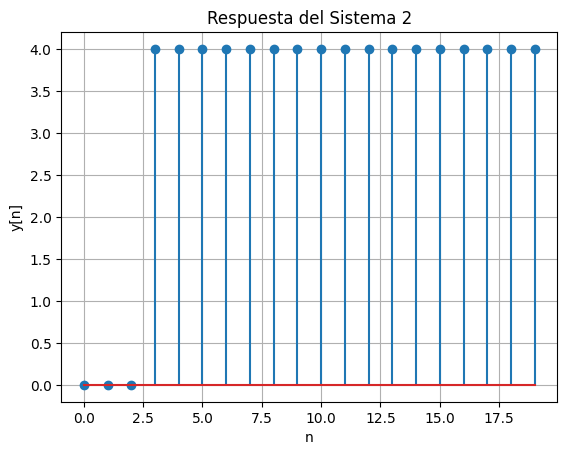

In [ ]:
def sistema2(x):
    y = np.zeros_like(x, dtype=float)
    for n in range(len(x)):
        y[n] = np.sum(x[:n+1]**2)
    return y

x = np.zeros(20)
x[3] = 2
y = sistema2(x)

plt.stem(np.arange(len(x)), y)
plt.title("Respuesta del Sistema 2")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid()
plt.show()


Sistema 3.

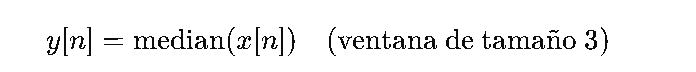


** Linealidad:**

No es lineal, la mediana no cumple con la propiedad de superposición.

** Invarianza en el tiempo:**

Aplicar un retardo a la entrada desplaza la salida:

Sí es invariante en el tiempo.

 No es SLIT.

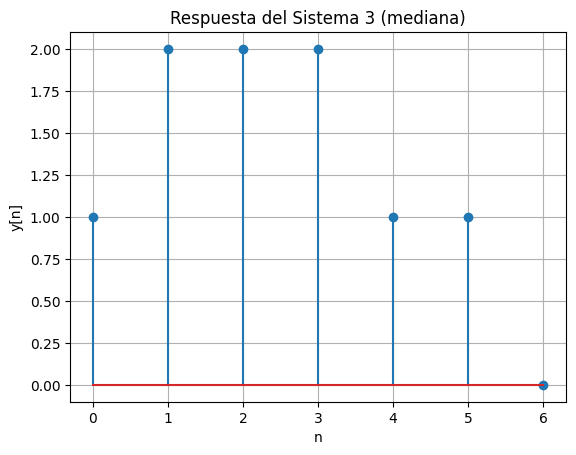

In [ ]:
from scipy.signal import medfilt

def sistema3(x):
    return medfilt(x, kernel_size=3)

x = np.array([1, 2, 100, 2, 1, 0, 1])
y = sistema3(x)

plt.stem(range(len(y)), y)
plt.title("Respuesta del Sistema 3 (mediana)")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid()
plt.show()


Sistema 4.

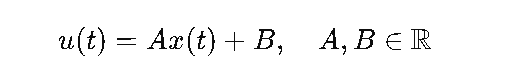

Linealidad:

Para que un sistema sea lineal debe cumplir:
Actividad

Si x1(t) --> ui (t), y x2 (t)--> u2 (t) entonces
x1 (t) + x2 (t) --> ui (t) + u2 (t)

- Homogeneidad
Si x(t)-->u (t) entonces
αx(t)→αu(t)

Ahora:

𝑢
(
𝑡
)
=
𝐴
𝑥
(
𝑡
)
+
𝐵

El término
𝐵
 rompe la homogeneidad:

Por ejemplo, si
𝑥
(
𝑡
)
=
0
, entonces
𝑢
(
𝑡
)
=
𝐵
≠
0
 → no hay nulidad.

Si multiplicamos la entrada por un escalar, la salida no se escala igual (el
𝐵
B permanece constante).

No es lineal.

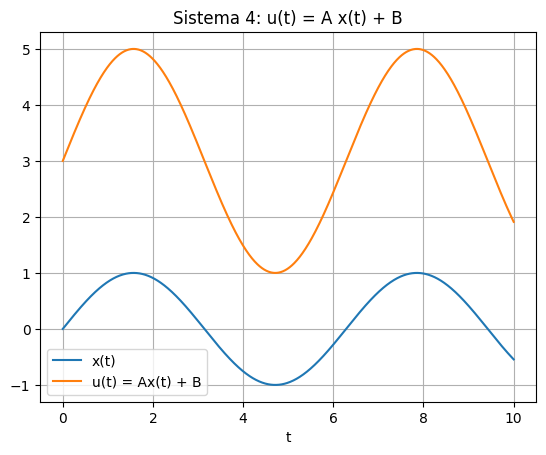

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sistema4(x, A=2, B=3):
    return A * x + B

t = np.linspace(0, 10, 1000)
x = np.sin(t)  # entrada

u = sistema4(x)

plt.plot(t, x, label='x(t)')
plt.plot(t, u, label='u(t) = Ax(t) + B')
plt.legend()
plt.grid()
plt.title("Sistema 4: u(t) = A x(t) + B")
plt.xlabel("t")
plt.show()


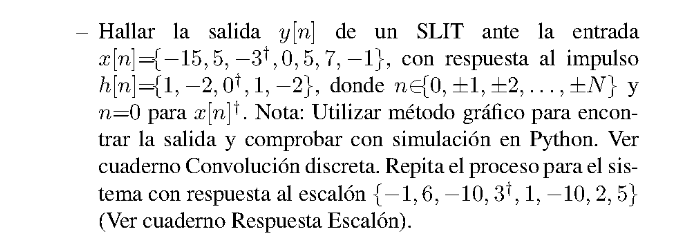

 Entrada
𝑥
[
𝑛
]
Tiene 7 valores:

𝑥
[
𝑛
]
=
{
−
15
,
5
,
−
3
,
0
,
5
,
7
,
−
1
}

Centro en
𝑛
= 0
 por lo tanto:

| n     | -3  | -2 | -1 | 0 | 1 | 2 | 3  |
| ----- | --- | -- | -- | - | - | - | -- |
| x\[n] | -15 | 5  | -3 | 0 | 5 | 7 | -1 |


Respuesta al impulso
ℎ
[
𝑛
]

h [n]
=
{
1
,
−
2
,
0
,
1
,
−
2
}

Centro en
𝑛
=
0
 entonces:

 | n     | -2 | -1 | 0 | 1 | 2  |
| ----- | -- | -- | - | - | -- |
| h\[n] | 1  | -2 | 0 | 1 | -2 |


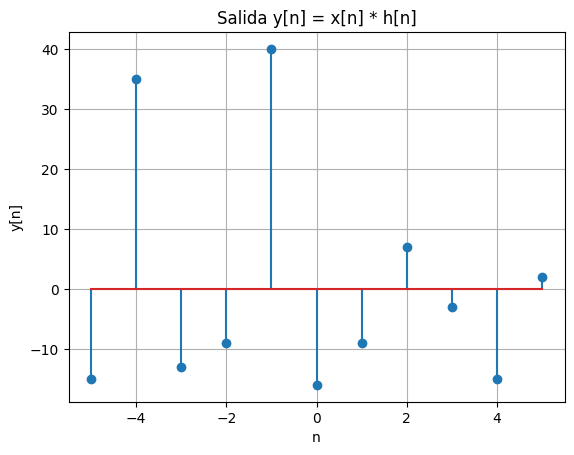

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Entrada x[n] con n = -3 a 3
x = np.array([-15, 5, -3, 0, 5, 7, -1])

# Respuesta al impulso h[n] con n = -2 a 2
h = np.array([1, -2, 0, 1, -2])

# Convolución
y = np.convolve(x, h)

# Eje de tiempo: n = -3 + (-2) hasta 3 + 2 → n = -5 a 5
n_y = np.arange(-5, 6)

# Graficar
# Eliminamos el argumento use_line_collection ya que ya no es necesario o está deprecado
plt.stem(n_y, y)
plt.title("Salida y[n] = x[n] * h[n]")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid(True)
plt.show()



REPETIR CON RESPUESTA AL ESCALÓN

Nueva
ℎ
[
𝑛
]  (respuesta al escalón):

h
esc[n]={−1 , 6 , −10 , 3 , 1 , −10 , 2 , 5 }

Centro en
𝑛
=
0 posición 3, o sea,
ℎ
𝑒
𝑠
𝑐
[
3
]
=
3

 Entonces abarca
𝑛
=
−
3
 a
4


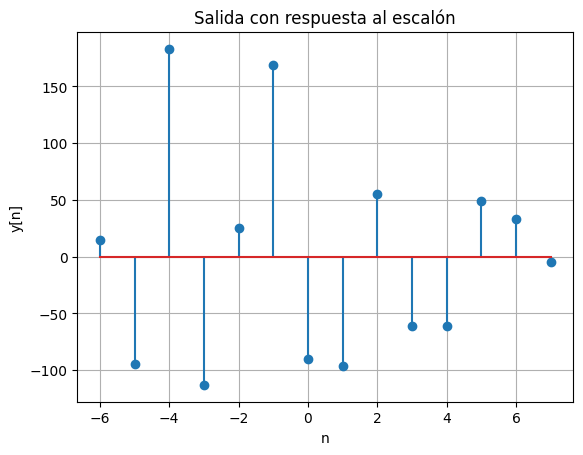

In [4]:
# Nueva respuesta h[n]: respuesta al escalón
h_esc = np.array([-1, 6, -10, 3, 1, -10, 2, 5])  # n = -3 a 4

# Convolución con nueva h[n]
y_esc = np.convolve(x, h_esc)

# Eje de tiempo: n = -3 + (-3) hasta 3 + 4 → n = -6 a 7
n_esc = np.arange(-6, 8)

# Graficar
# Eliminamos el argumento use_line_collection ya que ya no es necesario o está deprecado
plt.stem(n_esc, y_esc)
plt.title("Salida con respuesta al escalón")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid(True)
plt.show()
